# Exercice 1

### a) Load Data and remove NaN's

In [29]:
getwd()      #shows current working directory
#setwd(dir)  #set working directory

[1] "/Users/dennisvanelten/Desktop/R-Studium/Dennis-R"

In [30]:
data <- get(load("Daten.RData"))
#automatic naming: 'Datensatz'

In [31]:
ls()    #list objects in environment
#alternative command: objects()

[1] "data"      "Datensatz" "dot"

In [32]:
str(data)    #show structure
#alternative: load("Daten.RData")    str(Datensatz)

'data.frame':	100 obs. of  11 variables:
 $ PatientenNr      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Therapie         : int  3 3 1 2 1 3 2 1 2 2 ...
 $ Geschlecht       : chr  "w" "m" "m" "m" ...
 $ Alter            : num  51 47 21 53 65 52 NA 31 53 17 ...
 $ Groesse          : num  179 165 169 174 181 190 171 190 154 177 ...
 $ Gewicht1         : num  78 76 75 81 80 79 77 105 81 78 ...
 $ Blutdruck        : num  195 105 110 95 125 140 115 125 135 125 ...
 $ Raucherstatus    : chr  "ja" "ja" "nein" "." ...
 $ Gewicht2         : num  74 66 68 76 82 89 71 89 55 67 ...
 $ Zeit             : int  65 123 165 111 115 192 100 136 174 96 ...
 $ Ereignisindikator: num  1 0 0 1 1 0 0 0 1 1 ...


In [33]:
data <- na.omit(data)   #na.omit returns the object with incomplete cases removed
#deal with NaN's: na.omit() -> remove ; na.fail() -> check missing values in object ; is.na() -> check NaN's, returns TRUE / FALSE


In [34]:
dot <-which(Datensatz$Raucherstatus==".")     #list with specific values
data <- data[-dot,]                           #remove list dot from data ; "," is necessary

In [35]:
head(data,10)

PatientenNr Therapie Geschlecht Alter Groesse Gewicht1 Blutdruck
1   1          3        w          51    179      78      195      
2   2          3        m          47    165      76      105      
3   3          1        m          21    169      75      110      
5   5          1        m          65    181      80      125      
6   6          3        m          52    190      79      140      
8   8          1        m          31    190     105      125      
9   9          2        m          53    154      81      135      
10 10          2        m          17    177      78      125      
11 11          3        m          51    182      80      110      
12 12          3        m          14    150      45      105      
   Raucherstatus Gewicht2 Zeit Ereignisindikator
1  ja            74        65  1                
2  ja            66       123  0                
3  nein          68       165  0                
5  nein          82       115  1                
6  ja            89       192  0                
8  nein          89       136  0                
9  nein          55       174  1                
10 nein          67        96  1                
11 ja            80       151  0                
12 ja            58       140  1

### b) Absolute and relative frequencies

In [43]:
library(repr)      #global settings for plot size
options(repr.plot.width=5, repr.plot.height=4)

In [44]:
table(data$Therapie)   #absolute frequency + fill in vector
#absolute <- c(table(data$Therapie))


 1  2  3 
30 29 33 

In [45]:
#par(mar, mgp, las)    #settings plot size
#mar: 4-vector, sets the margin sizes, order: bottom, left, top, and right
#mgp: 3-vector, sets axis label location relative edge of inner plot window, locations labels, tick-mark labels, tick marks
#las: orientation tick mark labels and other text added to a plot, parallel to axis (default,0), always horizontal (1), perpendicular to axis (2), and always vertical (3)

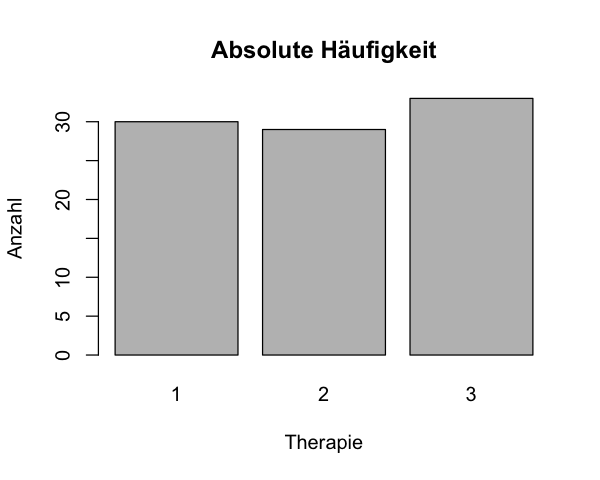

In [46]:
#par(mar=c(22, 7, 2, 2.1)) #
barplot(table(data$Therapie),main="Absolute Häufigkeit",xlab="Therapie",ylab="Anzahl")
#barplot(alternative)

In [47]:
round(table(data$Therapie)/length(data$Therapie),2)    #relative frequency; round result to 2 places


   1    2    3 
0.33 0.32 0.36 

In [48]:
#par(mar=c(22, 7, 2, 2.1)) 
barplot(table(data$Therapie)/length(data$Therapie),main="Relative Häufigkeit",xlab="Therapie",ylab="Anteil")

In [56]:
#par(mfrow=c(1,2))    #plots side by side
#barplot(table(data$Therapie),main="Absolute Häufigkeit",xlab="Therapie",ylab="Anzahl")
#barplot(table(data$Therapie)/length(data$Therapie),main="Relative Häufigkeit",xlab="Therapie",ylab="Anteil")

### c) Empirical distribution function

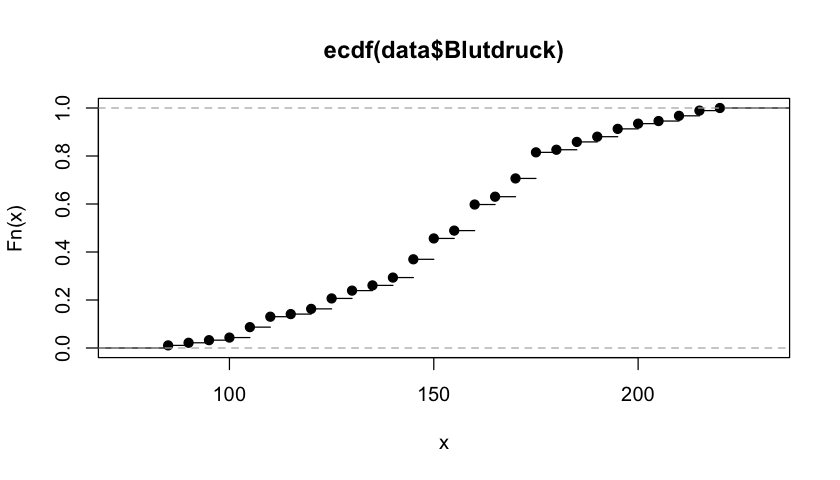

In [92]:
plot(ecdf(data$Blutdruck))
#empirical <- ecdf(data$Blutdruck)
#plot(empirical)

In [94]:
par(mfrow=c(1,2))
options(repr.plot.width=7, repr.plot.height=4)
plot.ecdf(data$Blutdruck[data$Raucherstatus=="ja"],xlab= "Raucher")
plot.ecdf(data$Blutdruck[data$Raucherstatus=="nein"],xlab= "Nichtraucher")

### c) Histogram

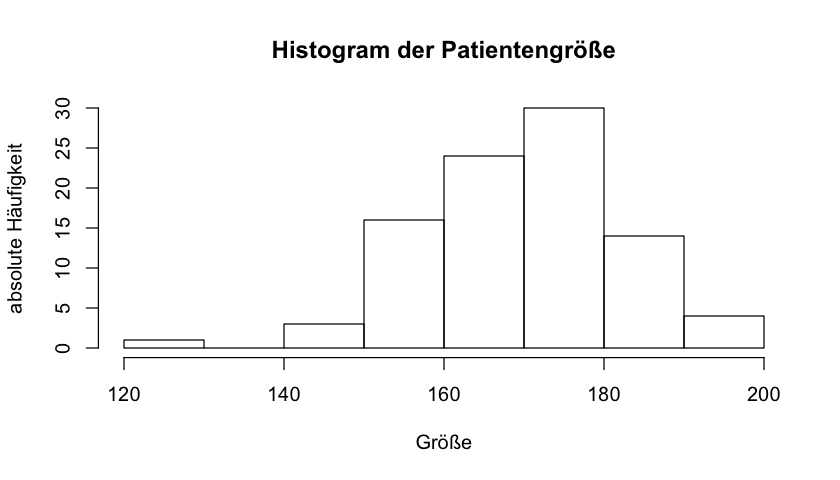

In [100]:
hist(data$Groesse,main="Histogram der Patientengröße",xlab="Größe",ylab="absolute Häufigkeit")

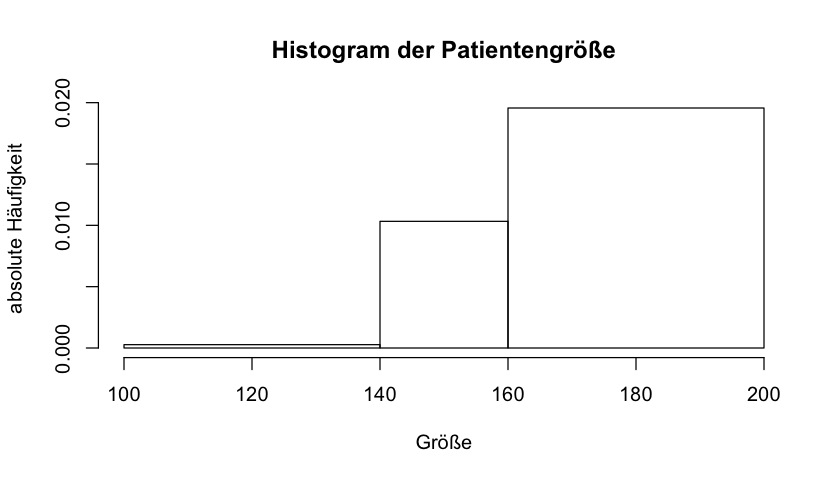

In [110]:
hist(data$Groesse,main="Histogram der Patientengröße",xlab="Größe",ylab="absolute Häufigkeit", breaks=c(100, 140, 160, 200),freq=F)   #breaks for binning widths, freq = T/F for absolute/relative density

In [135]:
par(mfrow=c(1,3))
range(data$Groesse)          #max and min value
hist(data$Groesse,5)         #suggestion
hist(data$Groesse,20)        #2nd suggestion
hist(data$Groesse,seq(120,200,by=10)) #binning width in sequence

[1] 122 200

In [136]:
attach(data)  #allows direct access to variables

The following objects are masked from data (pos = 3):

    Alter, Blutdruck, Ereignisindikator, Geschlecht, Gewicht1,
    Gewicht2, Groesse, PatientenNr, Raucherstatus, Therapie, Zeit



[1] 122 200

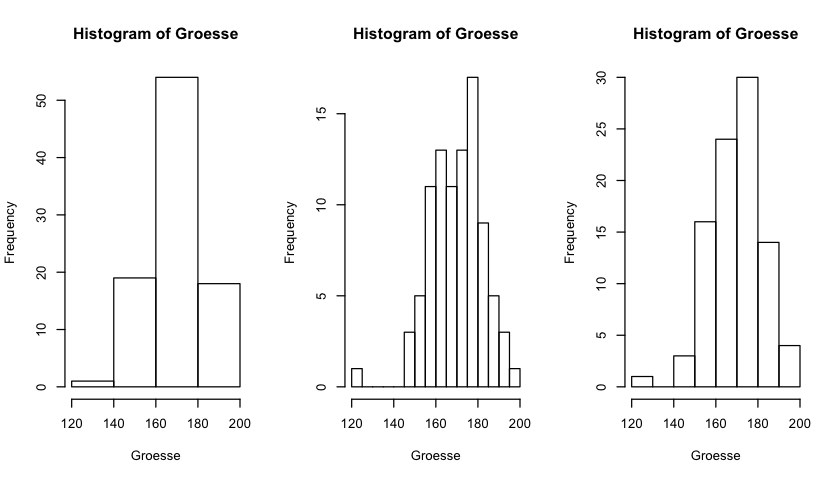

In [138]:
par(mfrow=c(1,3))
range(Groesse)          #max and min value
hist(Groesse,5)         #suggestion
hist(Groesse,20)        #2nd suggestion
hist(Groesse,seq(120,200,by=10)) #binning width in sequence